## Q4(b) Weighted Loss

In [1]:
from basic_fcn import *
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader_4 import *
from starter_4 import *

in starter_4
GPU_STATUS: True


In [2]:
class_weights = torch.FloatTensor([1.7796e-01, 6.1295e-01, 4.1182e-02, 8.9837e-03, 1.0163e-01, 6.8722e-03,
        1.4485e-03, 1.5937e-04, 4.7746e-02, 1.0698e-03])

In [3]:
# def compute_class_weights(dataloader):
#     # Labels: batch_size x height x width
#     total_num_pixels = 0
#     n_class = 10
#     class_weights = torch.zeros(n_class)
#     for i, (inputs, labels) in enumerate(dataloader):
#         total_num_pixels += labels.shape[0] * labels.shape[1] * labels.shape[2]
#         for cur_class in range(n_class):
#             class_weights[cur_class] += torch.sum(labels == cur_class)
#         print("SANITY CHECK:", total_num_pixels, class_weights.sum())
#         print("class_weights:", class_weights)
        
#     return class_weights / total_num_pixels

In [4]:
# train_dataset_original_1 = TASDataset('tas500v1.1') 
# train_loader_1 = DataLoader(dataset=train_dataset_original_1, batch_size= 16, shuffle=False)

# class_weights = compute_class_weights(train_loader_1)
# print(class_weights)

In [5]:
#hyper param
epochs = 30   
lr = 0.0004
criterion = nn.CrossEntropyLoss(weight=class_weights, reduction="mean")# Choose an appropriate loss function from https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
n_class = 10

print("creating model...")
fcn_model = FCN(n_class=n_class)
fcn_model.apply(init_weights)

# gpu
gpu_status = torch.cuda.is_available()
print("GPU:", gpu_status)

if gpu_status : 
    device = torch.device('cuda') # determine which device to use (gpu or cpu)
else : 
    device = torch.device('cpu')

fcn_model.to(device)
    
print("Training...")
val(fcn_model, 0)  # show the accuracy before training
model_name="latest_model_4b"
train_loss_record, valid_loss_record = train(fcn_model, epochs,lr, save_fp=model_name) 

creating model...
GPU: True
Training...
in val


/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


Loss at epoch: 0 is 2.8397714410509383
IoU at epoch: 0 is 0.0003728539616401706
Pixel acc at epoch: 0 is 0.0008532812020608357
in train
epoch0, iter0, loss: 2.6321277618408203
epoch0, iter10, loss: 2.18019700050354
epoch0, iter20, loss: 1.6711386442184448
epoch0, iter30, loss: 1.6097102165222168
epoch0, iter40, loss: 1.7687410116195679
epoch0, iter50, loss: 1.7071090936660767
Finish epoch 0, time elapsed 67.42162132263184
in val
Loss at epoch: 0 is 1.2871548192841666
IoU at epoch: 0 is 0.21094812422713385
Pixel acc at epoch: 0 is 0.7262602874210903
epoch1, iter0, loss: 1.351292371749878
epoch1, iter10, loss: 1.4092143774032593
epoch1, iter20, loss: 1.350829005241394
epoch1, iter30, loss: 1.0425996780395508
epoch1, iter40, loss: 1.2115914821624756
epoch1, iter50, loss: 1.4485557079315186
Finish epoch 1, time elapsed 109.77162575721741
in val
Loss at epoch: 1 is 1.057884727205549
IoU at epoch: 1 is 0.2387604383276
Pixel acc at epoch: 1 is 0.7889037302562169
epoch2, iter0, loss: 1.1881401

epoch19, iter0, loss: 0.5831043720245361
epoch19, iter10, loss: 0.3340051472187042
epoch19, iter20, loss: 0.38742193579673767
epoch19, iter30, loss: 0.30286914110183716
epoch19, iter40, loss: 0.4324777126312256
epoch19, iter50, loss: 0.4086636006832123
Finish epoch 19, time elapsed 112.49520349502563
in val
Loss at epoch: 19 is 0.34427346502031597
IoU at epoch: 19 is 0.4487941489859047
Pixel acc at epoch: 19 is 0.8949470860617501
epoch20, iter0, loss: 0.3515440821647644
epoch20, iter10, loss: 0.4704473316669464
epoch20, iter20, loss: 0.2990252375602722
epoch20, iter30, loss: 0.38412365317344666
epoch20, iter40, loss: 0.4741889238357544
epoch20, iter50, loss: 0.5592420101165771
Finish epoch 20, time elapsed 107.50206923484802
in val
Loss at epoch: 20 is 0.3381433742386954
IoU at epoch: 20 is 0.4955881963709956
Pixel acc at epoch: 20 is 0.899979659489223
epoch21, iter0, loss: 0.34507453441619873
epoch21, iter10, loss: 0.42256686091423035
epoch21, iter20, loss: 0.47563397884368896
epoch21

In [6]:
model_name="latest_model_4b"
latest_fcn_model = torch.load(model_name)
print(type(latest_fcn_model))
latest_fcn_model.to(device)
test(latest_fcn_model)

<class 'basic_fcn.FCN'>
in test
Loss :is 0.3269525979246412
IoU is 0.40395677843988537
Pixel is 0.8967769742012024


0

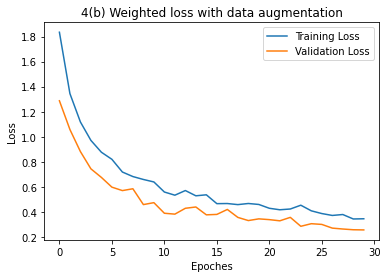

In [7]:
# Plot
plt.plot(np.arange(epochs), train_loss_record, label= "Training Loss")
plt.plot(np.arange(epochs), valid_loss_record, label="Validation Loss")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.title("4(b) Weighted loss with data augmentation")
plt.savefig("plots/Q4_b")
plt.show()

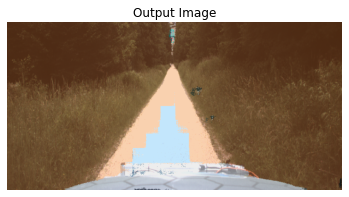

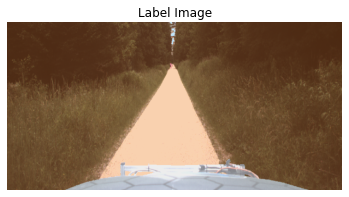

0

In [8]:
test_dataset = TASDataset('tas500v1.1', eval_mode=True, mode='test')
test_loader = DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)
visualize("latest_model_4b", test_loader, device)